In [66]:
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
url = "https://www.google.com/flights/explore/#explore;f=JFK,EWR,LGA;t=HND,NRT,TPE,HKG,KIX;s=1;li=8;lx=12;d=2016-12-25"
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.80 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap, service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)

In [55]:
driver.save_screenshot(r'flight_explorer.png')

True

In [56]:
s = BeautifulSoup(driver.page_source, "lxml")

<!DOCTYPE html>\n<html><head><meta content="text/html; charset=unicode-escape" http-equiv="content-type"/><meta content="baseUrl=/flights/explore//static/" name="deals::gwt:property"/><title>Explore flights</title><meta content="Explore flights" name="description"/><script async="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.FgPLF5SwqIU.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/rs=AHpOoo-9R8fkhlRsCMrG4wpDzgf1RI7BzQ/cb=gapi.loaded_0"></script><script language="javascript" type="text/javascript">\nvar __JS_ILT__ = new Date();\n</script>\n<style type="text/css">@-webkit-keyframes gb__a{0%{opacity:0}50%{opacity:1}}@keyframes gb__a{0%{opacity:0}50%{opacity:1}}#gbsfw{min-width:400px;overflow:visible}.gb_Pb,#gbsfw.gb_g{display:block;outline:none}#gbsfw.gb_qa iframe{display:none}.gb_Qb{padding:118px 0;text-align:center}.gb_Rb{background:no-repeat center 0;color:#aaa;font-size:13px;line-height:20px;padding-top:76px;background-image:-webkit-image-set(url
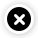
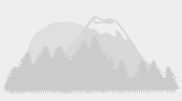

In [57]:
s

In [104]:
#best_price_tags = s.findAll('span', 'HHNOGPB-v-k')
best_price_tags = s.findAll('div', 'HHNOGPB-w-e')
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$', '')))

In [105]:
best_price = best_prices[0]

In [106]:
best_height_tags = s.findAll('div', 'HHNOGPB-w-f')
best_heights = []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style'].split('height:')[1].replace('px;', '')))

In [107]:
best_height = best_heights[0]

In [108]:
# calcualte the price per pixel of the height
pph = np.array(best_price)/np.array(best_height)

In [109]:
pph

14.39236888312313

In [189]:
cities = s.findAll('div', 'HHNOGPB-w-o')

In [188]:
len(cities)
cities[0]

<div class="HHNOGPB-w-o HHNOGPB-w-b"><div class="HHNOGPB-w-x HHNOGPB-w-M" style="left: 0px; height: 106px;"></div><div class="HHNOGPB-w-x" style="left: 6px; height: 105.58250183804222px;"></div><div class="HHNOGPB-w-x" style="left: 12px; height: 79.3427423589959px;"></div><div class="HHNOGPB-w-x" style="left: 18px; height: 94.65100829744775px;"></div><div class="HHNOGPB-w-x" style="left: 24px; height: 62.88635647516017px;"></div><div class="HHNOGPB-w-x" style="left: 30px; height: 62.065276756643215px;"></div><div class="HHNOGPB-w-x HHNOGPB-w-M" style="left: 36px; height: 73.11506144312573px;"></div><div class="HHNOGPB-w-x HHNOGPB-w-M" style="left: 42px; height: 73.08722823232853px;"></div><div class="HHNOGPB-w-x" style="left: 48px; height: 76.37154710639639px;"></div><div class="HHNOGPB-w-x" style="left: 54px; height: 81.6041907362672px;"></div><div class="HHNOGPB-w-x" style="left: 60px; height: 66.33071631131183px;"></div><div class="HHNOGPB-w-x" style="left: 66px; height: 61.00761474

In [193]:
hlist=[]
for bar in cities[0].findAll('div', 'HHNOGPB-w-x'):
    hlist.append(float(bar['style'].split('height: ')[1].replace('px;', ''))*pph)

In [194]:
hlist

[1525.5911016110517,
 1519.5823140561295,
 1141.9300162292682,
 1362.252226576416,
 905.08364010608398,
 893.266357914737,
 1052.2989352016784,
 1051.8983493646833,
 1099.1674781300717,
 1174.4776154850967,
 954.65613743419226,
 878.04409610893401,
 738.64022483473855,
 939.33372916914061,
 933.32494161421857,
 709.19716581561966,
 736.73744210901327,
 705.79218620116387,
 705.09116098642289,
 714.80536753354716,
 706.49321141590474,
 680.05454617424698,
 686.26362664766657,
 705.09116098642289,
 506.0,
 640.89728060800383,
 536.04393777461109,
 636.89142223805561,
 586.8181926137039,
 572.69754185963666,
 506.0,
 577.2041325258283,
 577.2041325258283,
 536.04393777461109,
 627.27736215018012,
 536.04393777461109,
 506.0,
 506.0,
 506.0,
 670.3403396271226,
 705.39160036416899,
 753.46190080354665,
 536.04393777461109,
 627.77809444642367,
 506.0,
 506.0,
 627.77809444642367,
 536.04393777461109,
 651.41265882911773,
 536.04393777461109,
 506.0,
 506.0,
 506.0,
 641.99889165973946,
 53

In [195]:
fares = pd.DataFrame(hlist, columns = ['price'])

In [196]:
fares.min()

price    506.0
dtype: float64

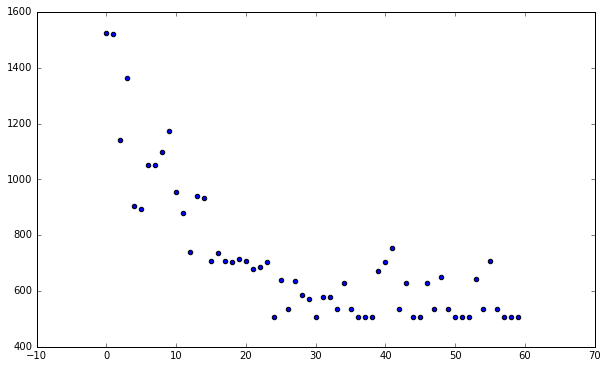

In [198]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(np.arange(len(fares['price'])), fares['price'])

In [204]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns = ['fare']).reset_index()

In [209]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [252]:
# standardlize the data ( x - x^bar)/std to get all of the data on the same basis
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps = 0.5, min_samples = 1).fit(X)

In [253]:
# all labels for the clustering 
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

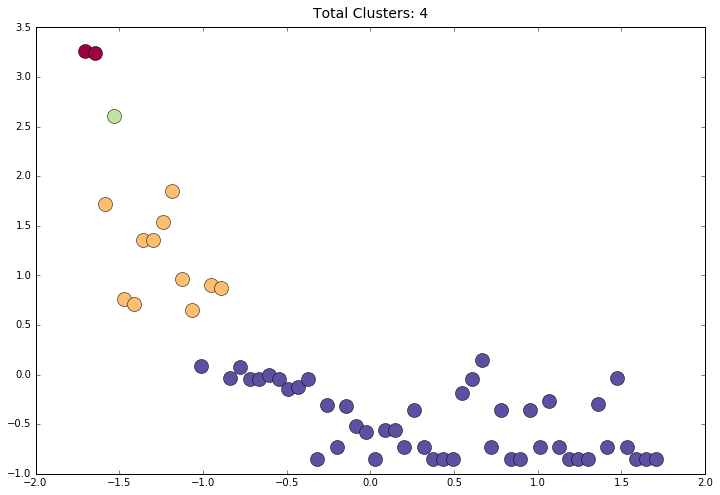

In [254]:
plt.subplots(figsize = (12,8))
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:,0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k', markersize = 14 )

plt.title("Total Clusters: {}".format(clusters), fontsize = 14, y = 1.01)

In [237]:
pf = pd.concat([ff, pd.DataFrame(db.labels_, columns = ['cluster'])], axis = 1)

In [238]:
pf

,index,fare,cluster
0,0,1525.591102,0
1,1,1519.582314,0
2,2,1141.930016,1
3,3,1362.252227,2
4,4,905.083640,1
5,5,893.266358,1
6,6,1052.298935,1
7,7,1051.898349,1
8,8,1099.167478,1
9,9,1174.477615,1


In [240]:
rf = pf.groupby('cluster')['fare'].agg(['min', 'count'])

In [247]:
rf

,min,count
cluster,,
0,1519.582314,2
1,878.044096,11
2,1362.252227,1
3,506.000000,46


In [248]:
rf.describe([.10, .25, .50, .75, .9])

,min,count
count,4.000000,4.000000
mean,1066.469659,15.000000
std,462.755816,21.150256
min,506.000000,1.000000
10%,617.613229,1.300000
25%,785.033072,1.750000
50%,1120.148161,6.500000
75%,1401.584748,19.750000
90%,1472.383288,35.500000
max,1519.582314,46.000000
